In [1]:

# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#Load data
df = pd.read_csv(r'C:\Users\dinhn\Downloads\BNB Historical Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,11.35,10.27,11.55,10.24,4.02M,10.45%
1,3/2/2019,11.75,11.35,11.80,10.83,3.89M,3.56%
2,3/3/2019,11.45,11.75,11.86,11.20,2.86M,-2.58%
3,3/4/2019,11.41,11.45,11.51,10.88,2.74M,-0.29%
4,3/5/2019,13.65,11.40,13.74,11.40,8.34M,19.61%
...,...,...,...,...,...,...,...
1915,5/28/2024,601.69,603.80,605.48,594.29,294.76K,-0.35%
1916,5/29/2024,595.59,601.69,603.59,593.29,219.96K,-1.01%
1917,5/30/2024,594.99,595.69,601.80,586.60,233.89K,-0.10%
1918,5/31/2024,593.80,594.99,598.89,590.10,175.98K,-0.20%


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

In [5]:
# Split the data into training, test dataset in a ratio of 7:3
train_size = int(0.7 * len(data_scaled))
test_size = int(0.3 * len(data_scaled))


train_data = data_scaled[: train_size]
test_data = data_scaled[train_size:]
     

In [6]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [7]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: -0.11041810301293459
Coefficients: [0.00056718]
R-squared: 0.5757823737629266


In [9]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred =  model.predict(x_test)

In [10]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mse = mean_squared_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSE on Test dataset: ", test_mse)

MAPE on Test dataset:  0.8640000129788188
RMSE on Test dataset:  250.2790507291798
MSE on Test dataset:  62639.603233899354


In [11]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

In [12]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted BNB prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted BNB prices for the next 30 days:
[662.25267848 662.63116066 663.00964284 663.38812502 663.7666072
 664.14508938 664.52357156 664.90205373 665.28053591 665.65901809
 666.03750027 666.41598245 666.79446463 667.17294681 667.55142898
 667.92991116 668.30839334 668.68687552 669.0653577  669.44383988
 669.82232206 670.20080423 670.57928641 670.95776859 671.33625077
 671.71473295 672.09321513 672.47169731 672.85017948 673.22866166]


In [13]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

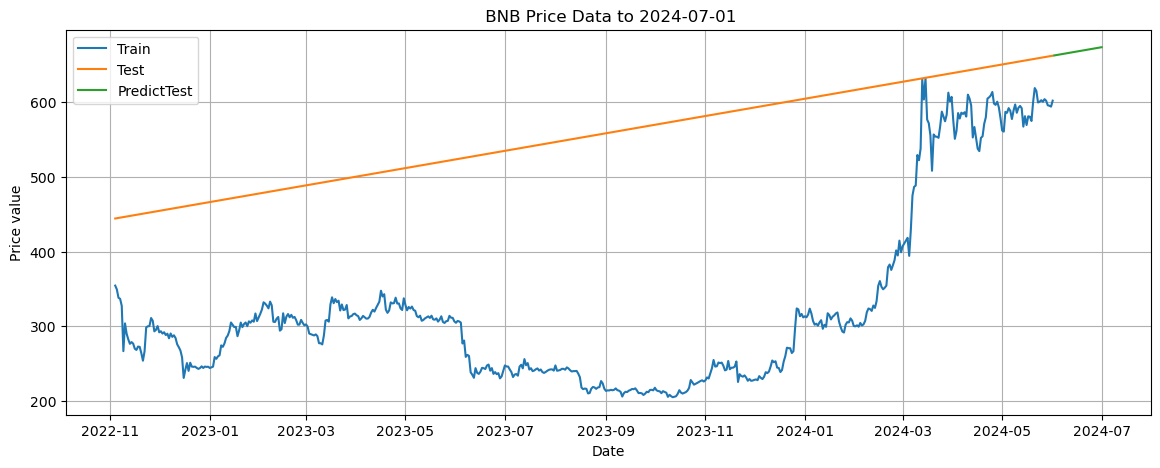

In [14]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f" BNB Price Data to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()
     

<h2> Predict for 60 days </h2>

In [15]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

In [16]:
# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted BNB prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted BNB prices for the next 60 days:
[662.25267848 662.63116066 663.00964284 663.38812502 663.7666072
 664.14508938 664.52357156 664.90205373 665.28053591 665.65901809
 666.03750027 666.41598245 666.79446463 667.17294681 667.55142898
 667.92991116 668.30839334 668.68687552 669.0653577  669.44383988
 669.82232206 670.20080423 670.57928641 670.95776859 671.33625077
 671.71473295 672.09321513 672.47169731 672.85017948 673.22866166
 673.60714384 673.98562602 674.3641082  674.74259038 675.12107256
 675.49955473 675.87803691 676.25651909 676.63500127 677.01348345
 677.39196563 677.77044781 678.14892998 678.52741216 678.90589434
 679.28437652 679.6628587  680.04134088 680.41982306 680.79830523
 681.17678741 681.55526959 681.93375177 682.31223395 682.69071613
 683.0691983  683.44768048 683.82616266 684.20464484 684.58312702]


In [17]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

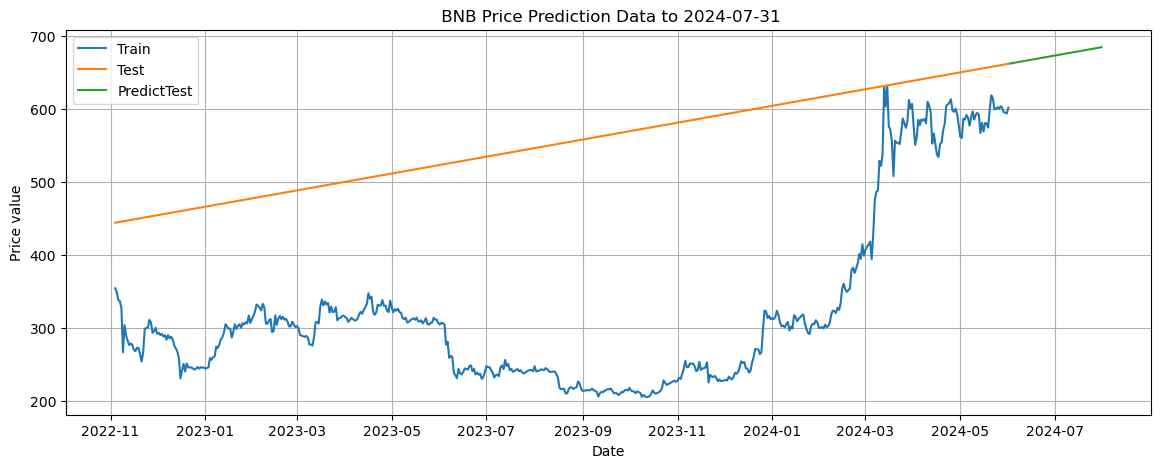

In [18]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f" BNB Price Prediction Data to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()

<h2> Predict 90 days
    </h2>

In [19]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [20]:
# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted BNB prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted BNB prices for the next 90 days:
[662.25267848 662.63116066 663.00964284 663.38812502 663.7666072
 664.14508938 664.52357156 664.90205373 665.28053591 665.65901809
 666.03750027 666.41598245 666.79446463 667.17294681 667.55142898
 667.92991116 668.30839334 668.68687552 669.0653577  669.44383988
 669.82232206 670.20080423 670.57928641 670.95776859 671.33625077
 671.71473295 672.09321513 672.47169731 672.85017948 673.22866166
 673.60714384 673.98562602 674.3641082  674.74259038 675.12107256
 675.49955473 675.87803691 676.25651909 676.63500127 677.01348345
 677.39196563 677.77044781 678.14892998 678.52741216 678.90589434
 679.28437652 679.6628587  680.04134088 680.41982306 680.79830523
 681.17678741 681.55526959 681.93375177 682.31223395 682.69071613
 683.0691983  683.44768048 683.82616266 684.20464484 684.58312702
 684.9616092  685.34009138 685.71857355 686.09705573 686.47553791
 686.85402009 687.23250227 687.61098445 687.98946663 688.3679488
 688.74643098 689.12491316 689.5033

In [21]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

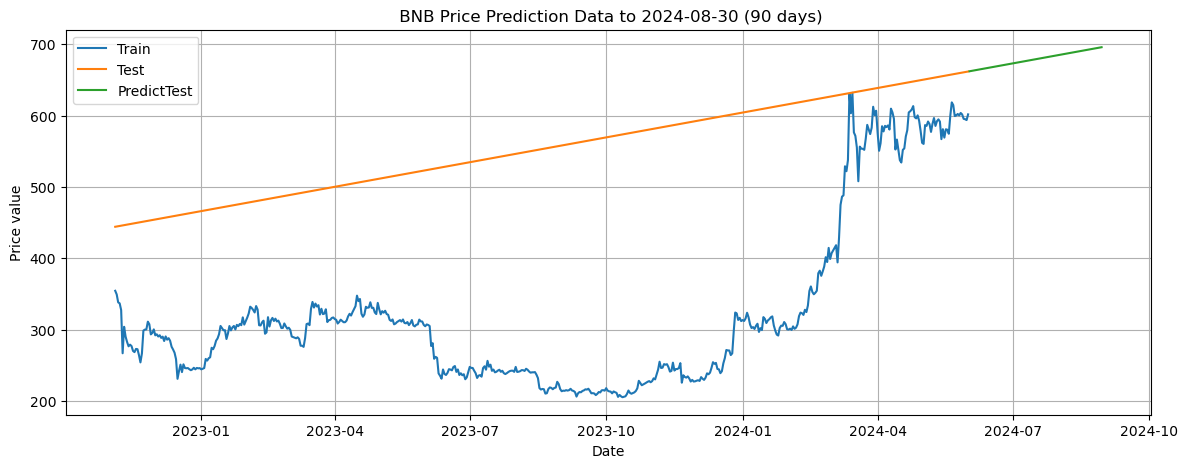

In [22]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f" BNB Price Prediction Data to {index_next_90_days[-1].strftime('%Y-%m-%d')} (90 days)")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()